<a href="https://colab.research.google.com/github/kty9798/machine_learning_study/blob/main/%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 책 파이토치 딥러닝 프로젝트 모음집

과적합  다중공선성

Lasso 와 Ridge

### 머신러닝과 딥러닝의 차이 (활용 데이터 형탸 차이 , 데이터 의전도 , 설명력 , 특징 추출 정도가 다름)

1. perceptron 뉴런(기본 단위)

2. 다층 퍼셉트론(MLP) 입력층과 출력층 사이에 은닉층이 쌓인 구조

In [ ]:
###################3

- parameter 즉 weight를 구하는 방법은 어떻게 될까? 
다층 퍼셉트론 --> 순전파(Feed forward) + 역전파(Back propagation)
1. 가중치를 임의로 주고 계산
2. 출력층에서 입력층의 방향으로 오차를 줄일 수 있게  가중치 조정
- `epoch` 는 feed forward 와 back propagation 이 한번 반복된것 
- 퍼셉트론 구조의 모든 네트크를 인공신경망이라 통칭

`경사 하강법` -> 오차 역전파 과정에서 오차를 줄이는 방향으로 가중치를 업데이트 하는 방식
- gradient 와 learning rate를 잘 조절하는 것이 필요
  

* 인공신경망의 장점 중 하나

비선형 활성함수를 이용하는 점 
- 왜냐하면 gradient vanishing 문제가 발생하였음(기울기 소실 문제)
그래서 최근엔 RELU(rectified Linear unit) 나 ELU(Exponential linear unit) 등을 사용

### 출력함수
1. 회귀 문제면 -> identify function 사용

2. 분류 문제 -> softmax Function 사용(입력값을 0에서 1사이로 정규화햐여 총합을 항상 1로 만드는 특징)

### 드롭아웃

일정 비율의 노드만 활용(인공지능이 앙상블해지는 효과)

### batch Nomalization

### CNN (convolution Neural Network)

convolution layer  pooling layer , fully connected layer 총 3개의 layer로 구성

1. convolution 합성곱 연산

2. pooling 은 feature map의 크기를 줄이는 방식

### RNN(Recurrent Neural Network)

- 음성인식 & 자연어 처리에 이용되는 알고리즘
- LSTM & GRU 의 근간

In [ ]:
## 실습 및 가상환경 구축

## 실습 및 가상환경 구축

In [ ]:
독립된 방을 만든다고 생각하면 편합

In [ ]:
'''#!conda create -n [가상환경 이름] python= []
activate []
deactivate []'''

In [ ]:
!pip install pytorch

  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
    Running setup.py install for pytorch ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-j0tk_zxu/pytorch_a7a5001ee3ed4bdebce6d1196715897d/setup.py'"'"'; __file__='"'"'/tmp/pip-install-j0tk_zxu/pytorch_a7a5001ee3ed4bdebce6d1196715897d/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-pzjpfcts/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/pytorch Check the logs for full command output.


In [ ]:
import torch

MNIST 데이터 이용해보기

In [ ]:
import torch
import torch.nn as nn #기본 구성 요소
import torch.nn.functional as F #자주 이용되는 함수를 담은 모듈
import torch.optim as optim #최적화 알고리즘
from torchvision import datasets , transforms

from matplotlib import pyplot as plt
%matplotlib inline
#코드 실행시 브라우저에서 바로 그림을 보려면 적어줘야하는 코드

In [ ]:
is_coda = torch.cuda.is_available()
device = torch.device('cuda' if is_coda else 'cpu')

print('current cuda device is ',   device)

current cuda device is  cpu


In [ ]:
batch_size = 50
epoch_num = 15
learning_rate = 0.0001

In [ ]:
train_data = datasets.MNIST(root = './data' ,train = True , download = True , transform = transforms.ToTensor())
test_data = datasets.MNIST(root = './data' ,train = False , transform = transforms.ToTensor())
print(len(train_data))

60000


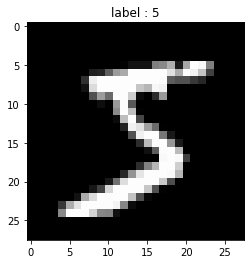

In [ ]:
image , label = train_data[0]

plt.imshow(image.squeeze().numpy() , cmap = "gray")
plt.title("label : %s" % label)
plt.show()

In [ ]:
train_data[0]

미리 지정한 배치 사이즈를 통해 구상

In [ ]:
train_loader= torch.utils.data.DataLoader(dataset = train_data , 
                                          batch_size = batch_size,
                                          shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_data , 
                                          batch_size = batch_size,
                                          shuffle = True)


In [ ]:
first_batch = train_loader.__iter__().__next__()
print("{:15s}  | {:25s} | {}".format('name' , 'type' , 'size'))
print("{:15s}  | {:25s} | {}".format('Num of batch' , '' , len(train_loader)))
print("{:15s}  | {:25s} | {}".format('first batch' , str(type(first_batch)) , len(first_batch)))
print("{:15s}  | {:25s} | {}".format('first batch[0]' , str(type(first_batch[0])) , first_batch[0].shape))
print("{:15s}  | {:25s} | {}".format('first batch[1]' , str(type(first_batch[1])) , first_batch[1].shape))

name             | type                      | size
Num of batch     |                           | 1200
first batch      | <class 'list'>            | 2
first batch[0]   | <class 'torch.Tensor'>    | torch.Size([50, 1, 28, 28])
first batch[1]   | <class 'torch.Tensor'>    | torch.Size([50])


#### 모델 형성

In [ ]:
class CNN(nn.Module): #nn.module 을 상속받는 클래스르 정의

  def __init__(self): #사용되는 가중치 정의
    super(CNN , self).__init__() #nn.module을 상속받고 초기화
    self.conv1 = nn.Conv2d(1 , 32 , 3 ,1)
    self.conv2 = nn.Conv2d(32 , 64 , 3 , 1)
    self.dropout1 = nn.Dropout2d(0.25)
    self.dropout2 = nn.Dropout2d(0.5)
    self.fc1 = nn.Linear(9216 , 128)
    self.fc2 = nn.Linear(128 , 10)

  def forward(self, x):
    x = self.conv1(x)
    x = F.relu(x)
    x = self.conv2(x)
    x= F.relu(x)
    x = F.max_pool2d(x  , 2)
    x = self.dropout1(x)
    x = torch.flatten(x , 1) 
    x = self.fc1(x)
    x = F.relu(x)
    x = self.dropout2(x)
    x = self.fc2(x)
    output = F.log_softmax(x , dim =1 )
    return output

In [ ]:
print(learning_rate)

0.0001


In [ ]:
model = CNN().to(device)
optimizer = optim.Adam(model.parameters() , lr  = learning_rate)
criterion = nn.CrossEntropyLoss()

In [ ]:
print(model)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


#### 모델 학습


In [ ]:
device = "cuda"

In [ ]:
model.train()
i=0
for epoch in range(epoch_num):
  for data , target in train_loader:
    data = data.to(device)
    target = target.to(device)
    optimizer.zero_grad()
    output= model(data)
    loss = criterion(output , target)
    loss.backward()
    optimizer.step()
    if i % 1000 ==0:
      print("train Step : {}\t Loss : {:.3f}".format(i , loss.item()))
    i+=1

train Step : 0	 Loss : 2.315
train Step : 1000	 Loss : 0.212
train Step : 2000	 Loss : 0.133
train Step : 3000	 Loss : 0.086
train Step : 4000	 Loss : 0.109
train Step : 5000	 Loss : 0.116
train Step : 6000	 Loss : 0.162
train Step : 7000	 Loss : 0.033
train Step : 8000	 Loss : 0.025
train Step : 9000	 Loss : 0.050
train Step : 10000	 Loss : 0.033
train Step : 11000	 Loss : 0.034
train Step : 12000	 Loss : 0.046
train Step : 13000	 Loss : 0.009
train Step : 14000	 Loss : 0.007
train Step : 15000	 Loss : 0.081
train Step : 16000	 Loss : 0.019
train Step : 17000	 Loss : 0.037
train Step : 18000	 Loss : 0.003
train Step : 19000	 Loss : 0.023
train Step : 20000	 Loss : 0.025
train Step : 21000	 Loss : 0.023
train Step : 22000	 Loss : 0.014
train Step : 23000	 Loss : 0.036
train Step : 24000	 Loss : 0.008
train Step : 25000	 Loss : 0.027
train Step : 26000	 Loss : 0.002
train Step : 27000	 Loss : 0.010
train Step : 28000	 Loss : 0.004
train Step : 29000	 Loss : 0.049
train Step : 30000	 Los

In [ ]:
model.eval() #dropout이 적용되지 않고 batch-normalization인 평가모드로 변환 
correct = 0

for data , target in test_loader:
  data  = data.to('cuda')
  target = target.to('cuda')
  output = model(data)
  prediction = output.data.max(1)[1]
  correct += prediction.eq(target.data).sum()

print('Test set: accuracy : {:.2f}%'.format(100 * correct/len(test_loader.dataset)))


Test set: accuracy : 99.25%


### 실전 파트